# Proyek Analisis Data : Bike Sharing Dataset
- **Nama :** Aritua Hamonangan Hutagalung
- **Email :** arituahutagalung@gmail.com
- **ID Dicoding :** galoenks06

# Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berubah berdasarkan musim, dan apa implikasinya bagi layanan peminjaman sepeda?
- Bagaimana Penggunaan Sepeda pada hari libur dan hari hari biasa?


# Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
 day_df = pd.read_csv("day.csv")
 day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Insight

  1. Pada kedua data tidak terdapat missing value dan duplicate
  2. Pada kedua data hanya terdapat kesalahan tipe data pada kolom dteday
  


# Cleaning Data

## Membersihkan Data day_df

In [10]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [37]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_map)

In [38]:
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

day_df['weathersit'] = day_df['weathersit'].map(weather_map)

In [39]:
day_map={
    0:"Sunday",
    1:"Monday",
    2:"Tuesday",
    3:"Wednesday",
    4:"Thursday",
    5:"Friday",
    6:"Saturday"}
day_df['weekday'] = day_df['weekday'].map(day_map)

In [42]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Membersihkan Data hour_df

In [12]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [43]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

hour_df['season'] = hour_df['season'].map(season_map)

In [44]:
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

In [45]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,NaN,0,1,0,0,6,0,NaN,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,NaN,0,1,1,0,6,0,NaN,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,NaN,0,1,2,0,6,0,NaN,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,NaN,0,1,3,0,6,0,NaN,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,NaN,0,1,4,0,6,0,NaN,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

### Eksplorasi Data day_df

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
print("\nRata-Rata Sepeda yang di Pinjam Berdasarkan Musim:")
print(day_df.groupby(by="season")["cnt"].agg(["max", "min", "mean", "std", "count"]))


Rata-Rata Sepeda yang di Pinjam Berdasarkan Musim:
         max   min         mean          std  count
season                                             
Fall    8714  1115  5644.303191  1459.800381    188
Spring  7836   431  2604.132597  1399.942119    181
Summer  8362   795  4992.331522  1695.977235    184
Winter  8555    22  4728.162921  1699.615261    178


In [18]:
print("\nRata-Rata Sepeda yang di Pinjam Berdasarkan Cuaca:")
print(day_df.groupby(by="weathersit")["cnt"].agg(["max", "min", "mean", "std", "count"]))


Rata-Rata Sepeda yang di Pinjam Berdasarkan Cuaca:
             max  min         mean          std  count
weathersit                                            
Clear       8714  431  4876.786177  1879.483989    463
Light Rain  4639   22  1803.285714  1240.284449     21
Mist        8362  605  4035.862348  1809.109918    247


In [20]:
print("\nJumlah Sepeda yang di Pinjam Berdasarkan Hari:")
print(day_df.groupby(day_df['weekday'].replace(day_map))['cnt'].sum().sort_values(ascending=False))



Jumlah Sepeda yang di Pinjam Berdasarkan Hari:
weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [21]:
holiday_labels = {0: "Bukan Hari Libur", 1: "Hari Libur"}
print("\nJumlah Sepeda yang dipinjam Berdasarkan Hari Libur")
print(day_df.replace({"holiday": holiday_labels}).groupby("holiday")["cnt"].sum().sort_values(ascending=False))


Jumlah Sepeda yang dipinjam Berdasarkan Hari Libur
holiday
Bukan Hari Libur    3214244
Hari Libur            78435
Name: cnt, dtype: int64


In [22]:
workingday_labels = {0: "Bukan Hari Libur", 1: "Hari Libur"}
print("\nJumlah Sepeda yang dipinjam Berdasarkan Hari kerja")
print(day_df.replace({"workingday": workingday_labels}).groupby("workingday")["cnt"].sum().sort_values(ascending=False))


Jumlah Sepeda yang dipinjam Berdasarkan Hari kerja
workingday
Hari Libur          2292410
Bukan Hari Libur    1000269
Name: cnt, dtype: int64


In [23]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Eksplorasi Data hour_df

In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [26]:
print("\nRata-Rata Sepeda yang di Pinjam Berdasarkan Musim:")
print(hour_df.groupby(by="season")["cnt"].agg(["max", "min", "mean", "std", "count"]))


Rata-Rata Sepeda yang di Pinjam Berdasarkan Musim:
        max  min        mean         std  count
season                                         
Fall    977    1  236.016237  197.711630   4496
Spring  801    1  111.114569  119.224010   4242
Summer  957    1  208.344069  188.362473   4409
Winter  967    1  198.868856  182.967972   4232


In [28]:
print("\nRata-Rata Sepeda yang di Pinjam Berdasarkan Cuaca:")
print(hour_df.groupby(by="weathersit")["cnt"].agg(["max", "min", "mean", "std", "count"]))


Rata-Rata Sepeda yang di Pinjam Berdasarkan Cuaca:
            max  min        mean         std  count
weathersit                                         
Clear       977    1  204.869272  189.487773  11413
Heavy Rain  164   23   74.333333   77.925178      3
Light Rain  891    1  111.579281  133.781045   1419
Mist        957    1  175.165493  165.431589   4544


In [29]:
print("\nJumlah Sepeda yang di Pinjam Berdasrkan Ja:")
print(hour_df.groupby("hr")["cnt"].sum())


Jumlah Sepeda yang di Pinjam Berdasrkan Ja:
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


### Eksplorasi Data Gabungan

In [31]:
# Pilih hanya kolom unik dari day.csv agar tidak tabrakan
day_data_for_merge = day_df[['dteday', 'season', 'holiday', 'weekday', 'workingday']]

# Merge ke hour.csva
all_df = hour_df.merge(day_data_for_merge, on='dteday', suffixes=('_hour', '_day'))


In [32]:
all_df.head()

,instant,dteday,season_hour,yr,mnth,hr,holiday_hour,weekday_hour,workingday_hour,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_day,holiday_day,weekday_day,workingday_day
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,0.2879,0.81,0.0,3,13,16,Spring,0,Saturday,0
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,...,0.2727,0.80,0.0,8,32,40,Spring,0,Saturday,0
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,...,0.2727,0.80,0.0,5,27,32,Spring,0,Saturday,0
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,...,0.2879,0.75,0.0,3,10,13,Spring,0,Saturday,0
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,...,0.2879,0.75,0.0,0,1,1,Spring,0,Saturday,0


# Visualization & Explanatory Analysis

## Apakah musim mempengaruhi jumlah peminjaman sepeda?

In [33]:
day_df.groupby(by = "season").agg({
    "cnt" : "sum",
})

,cnt
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


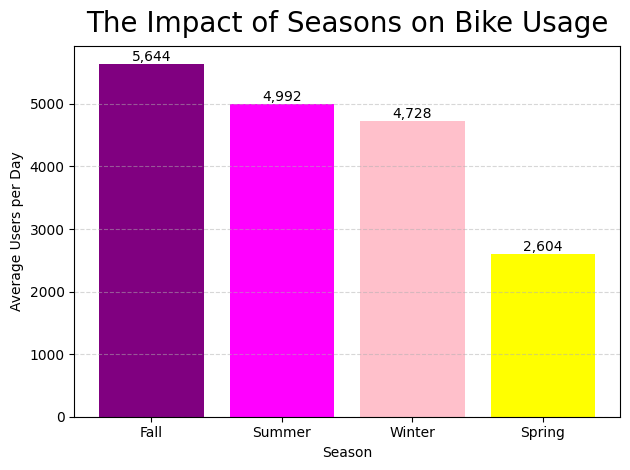

In [48]:
# Baca data
# Ganti angka season jadi label
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_labels)

# Hitung statistik per season
df_stat = day_df.groupby('season')['cnt'].agg(['sum', 'count', 'mean']).round(2).reset_index()
df_stat = df_stat.rename(columns={'sum': 'total_users', 'count': 'total_days', 'mean': 'avg_users_per_day'})

# Urutkan berdasarkan rata-rata pengguna
df_stat = df_stat.sort_values(by='avg_users_per_day', ascending=False)

# Plot
season_colors = {
    'Spring': 'yellow',
    'Summer': 'magenta',
    'Fall': 'purple',
    'Winter': 'pink'
}

colors = [season_colors[season] for season in df_stat['season']]
bars = plt.bar(df_stat['season'], df_stat['avg_users_per_day'], color=colors)

# Tambah label di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# Styling
plt.title("The Impact of Seasons on Bike Usage", pad=10,fontsize=20)
plt.xlabel("Season")
plt.ylabel("Average Users per Day")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Bagaimana Penggunaan Sepeda pada hari libur dan hari hari biasa?

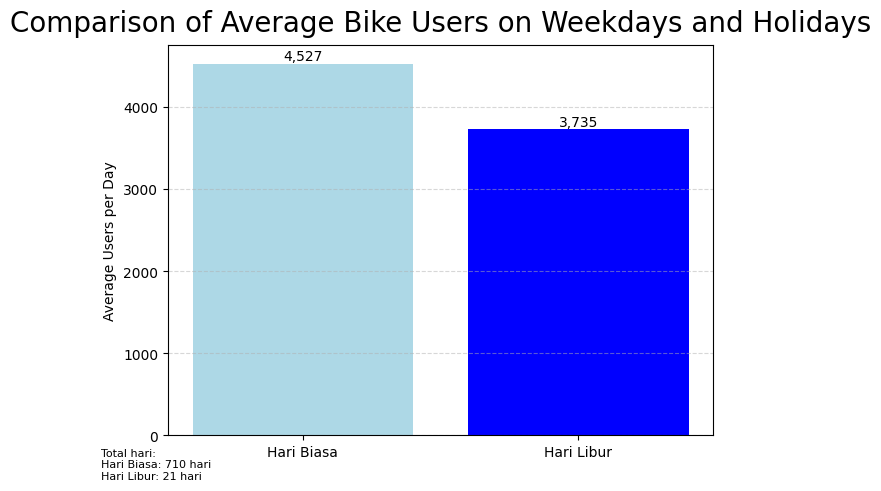

In [49]:
# Ganti label hari: 0 -> Hari Biasa, 1 -> Hari Libur
day_df['holiday_label'] = day_df['holiday'].map({0: 'Hari Biasa', 1: 'Hari Libur'})

# Hitung statistik per kategori holiday
df_stat = day_df.groupby('holiday_label')['cnt'].agg(total_users='sum', total_days='count', avg_users_per_day='mean'
).round(2).reset_index()

# Plot
holiday_colors = {
    'Hari Biasa': 'lightblue',
    'Hari Libur': 'blue'
}

colors = [holiday_colors[label] for label in df_stat['holiday_label']]
bars = plt.bar(df_stat['holiday_label'], df_stat['avg_users_per_day'], color=colors)


# Tambah label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# Styling
plt.title("Comparison of Average Bike Users on Weekdays and Holidays", pad=10,fontsize=20)
plt.ylabel("Average Users per Day")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Info tambahan di bawah
plt.figtext(0.02, -0.01,
            f'Total hari:\nHari Biasa: {int(df_stat.loc[df_stat["holiday_label"]=="Hari Biasa", "total_days"].values[0])} hari\n'
            f'Hari Libur: {int(df_stat.loc[df_stat["holiday_label"]=="Hari Libur", "total_days"].values[0])} hari',
            fontsize=8)

plt.tight_layout()
plt.show()

# CONCLUSION
Pertanyaan 1 Bagaimana pola penggunaan sepeda berubah berdasarkan musim, dan apa implikasinya bagi layanan peminjaman sepeda?
  - Jawaban : Berdasarkan analisis data peminjaman sepeda harian berdasarkan musim, dapat disimpulkan bahwa cuaca memiliki pengaruh terhadap jumlah peminjaman. Musim gugur dan musim panas menunjukkan jumlah rata-rata peminjaman yang lebih tinggi dibanding musim semi dan musim dingin. Hal ini menunjukkan bahwa kondisi cuaca yang lebih stabil dan nyaman mendorong lebih banyak orang untuk menggunakan sepeda. Untuk meningkatkan penggunaan di musim semi, layanan bisa memberikan promo atau insentif kepada pengguna, seperti tarif lebih murah atau program loyalitas.

Pertanyaan 2 Bagaimana Penggunaan Sepeda pada hari libur dan hari hari biasa?
  - Jawaban : Rata-rata pengguna sepeda per hari pada hari biasa (4.527) lebih tinggi dibandingkan hari libur (3.735), berdasarkan data selama 710 hari biasa dan 21 hari libur. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin. Namun demikian, hari libur tetap menunjukkan tingkat penggunaan yang cukup tinggi, sehingga pemilik usaha dapat mempertimbangkan penambahan unit sepeda pada hari libur untuk mengantisipasi lonjakan pengguna.

In [36]:
all_df.to_csv("all_data.csv", index=False)